In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

import emcee
from gatspy.periodic import LombScargleFast
import corner

import sys
sys.path.append("../code/")
import prob
import orbit
import gaia_tools as gaia
import run_set
import plotting

%matplotlib inline

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# Constants in cgs
Msun = 1.989e33 
G = 6.674e-8
secday = 3600.0*24.0
secyer = 3600.0*24.0*365.25
AUincm = 1.496e13 
pcincm = 3.086e18

### Plotting scripts

In [3]:
def plot_pos(p, obs_pos):

    t_tmp = np.linspace(np.min(obs_pos['time']), np.max(obs_pos['time']), 100)

    
    if type(p) is tuple or p.ndim==1:
        if len(p)==8:
            p_full = 0.0, 0.0, p[0], p[1], p[2], p[3], 0.0, p[4], p[5], p[6], p[7], 1.0e3/obs_pos['plx'][0]
        elif len(p)==9:
            p_full = 0.0, 0.0, p[0], p[1], p[2], p[3], p[4], p[5], p[6], p[7], p[8], 1.0e3/obs_pos['plx'][0]
        else:
            p_full = p
            
        ra, dec = orbit.get_ra_dec(p_full, t_tmp)
        plt.plot(ra*3600.0*1.0e3, dec*3600.0*1.0e3, color='k')
    else: 
        for x in p:
            if len(x)==8:
                p_full = 0.0, 0.0, x[0], x[1], x[2], x[3], 0.0, x[4], x[5], x[6], x[7], 1.0e3/obs_pos['plx'][0]
            elif len(x)==9:
                p_full = 0.0, 0.0, x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8], 1.0e3/obs_pos['plx'][0]
            else:
                p_full = x
                
            ra, dec = orbit.get_ra_dec(p_full, t_tmp)
            plt.plot(ra*3600.0*1.0e3, dec*3600.0*1.0e3, alpha=0.05, color='k')


    plt.scatter(obs_pos['ra']*3600.0*1.0e3, obs_pos['dec']*3600.0*1.0e3)

#     plt.xlim(-2, 2)
#     plt.ylim(-2, 2)
    plt.xlabel(r"$\Delta\ \alpha$ (mas)")
    plt.ylabel(r"$\Delta\ \delta$ (mas)")
    plt.axis('equal')
    
    plt.show()
    
def plot_pos_ra(p, obs_pos):

    t_tmp = np.linspace(np.min(obs_pos['time']), np.max(obs_pos['time']), 100)

    
    if type(p) is tuple or p.ndim==1:
        if len(p)==8:
            p_full = 0.0, 0.0, p[0], p[1], p[2], p[3], 0.0, p[4], p[5], p[6], p[7], 1.0e3/obs_pos['plx'][0]
        elif len(p)==9:
            p_full = 0.0, 0.0, p[0], p[1], p[2], p[3], p[4], p[5], p[6], p[7], p[8], 1.0e3/obs_pos['plx'][0]
        else:
            p_full = p

        ra, dec = orbit.get_ra_dec(p_full, t_tmp)
        plt.plot(t_tmp/secyer, ra*3600.0*1.0e3, color='k')
    else: 
        for x in p:
            if len(x)==8:
                p_full = 0.0, 0.0, x[0], x[1], x[2], x[3], 0.0, x[4], x[5], x[6], x[7], 1.0e3/obs_pos['plx'][0]
            elif len(x)==9:
                p_full = 0.0, 0.0, x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8], 1.0e3/obs_pos['plx'][0]
            else:
                p_full = x
                
            ra, dec = orbit.get_ra_dec(p_full, t_tmp)
            plt.plot(t_tmp/secyer, ra*3600.0*1.0e3, alpha=0.05, color='k')


    plt.scatter(obs_pos['time']/secyer, obs_pos['ra']*3600.0*1.0e3)

#     plt.ylim(-2, 2)
    plt.xlabel("Time (yr)")
    plt.ylabel(r"$\Delta\ \alpha$ (mas)")

    plt.show()
    
def plot_pos_dec(p, obs_pos):

    t_tmp = np.linspace(np.min(obs_pos['time']), np.max(obs_pos['time']), 100)

    
    if type(p) is tuple or p.ndim==1:
        if len(p)==8:
            p_full = 0.0, 0.0, p[0], p[1], p[2], p[3], 0.0, p[4], p[5], p[6], p[7], 1.0e3/obs_pos['plx'][0]
        elif len(p)==9:
            p_full = 0.0, 0.0, p[0], p[1], p[2], p[3], p[4], p[5], p[6], p[7], p[8], 1.0e3/obs_pos['plx'][0]
        else:
            p_full = p
            
        ra, dec = orbit.get_ra_dec(p_full, t_tmp)
        plt.plot(t_tmp/secyer, dec*3600.0*1.0e3, color='k')
    else: 
        for x in p:
            if len(x)==8:
                p_full = 0.0, 0.0, x[0], x[1], x[2], x[3], 0.0, x[4], x[5], x[6], x[7], 1.0e3/obs_pos['plx'][0]
            elif len(x)==9:
                p_full = 0.0, 0.0, x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8], 1.0e3/obs_pos['plx'][0]
            else:
                p_full = x
                
            ra, dec = orbit.get_ra_dec(p_full, t_tmp)
            plt.plot(t_tmp/secyer, dec*3600.0*1.0e3, alpha=0.05, color='k')


    plt.scatter(obs_pos['time']/secyer, obs_pos['dec']*3600.0*1.0e3)

#     plt.ylim(-2, 2)
    plt.xlabel("Time (yr)")
    plt.ylabel(r"$\Delta\ \delta$ (mas)")

    plt.show()


def plot_rv(p, obs_pos):

    t_tmp = np.linspace(np.min(obs_pos['time']), np.max(obs_pos['time']), 100)

    
    if type(p) is tuple or p.ndim==1:
        if len(p)==8:
            p_full = 0.0, 0.0, p[0], p[1], p[2], p[3], 0.0, p[4], p[5], p[6], p[7], 1.0e3/obs_pos['plx'][0]
        elif len(p)==9:
            p_full = 0.0, 0.0, p[0], p[1], p[2], p[3], p[4], p[5], p[6], p[7], p[8], 1.0e3/obs_pos['plx'][0]
        else:
            p_full = p

        rv = orbit.get_RV(p_full, t_tmp)
        plt.plot(t_tmp/secyer, rv, color='k')
    else: 
        for x in p:
            if len(x)==8:
                p_full = 0.0, 0.0, x[0], x[1], x[2], x[3], 0.0, x[4], x[5], x[6], x[7], 1.0e3/obs_pos['plx'][0]
            elif len(x)==9:
                p_full = 0.0, 0.0, x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8], 1.0e3/obs_pos['plx'][0]
            else:
                p_full = x
                
            rv = orbit.get_RV(p_full, t_tmp)
            plt.plot(t_tmp/secyer, rv, alpha=0.05, color='k')


    plt.scatter(obs_pos['time']/secyer, obs_pos['rv'])
    plt.xlabel("Time (yr)")
    plt.ylabel("Radial velocity (km s$^{-1}$)")

    plt.show()
    
    
def plot_trace(chains, alpha=0.05, filename=None):
    
    fig, ax = plt.subplots(6, 2, figsize=(12, 18))
    
    labels=[r'$\alpha$', r'$\delta$', r'$\Omega$', r'$\omega$', r'$i$', r'$\tau$', r'$e$', r'$P_{\rm orb}$', 
            r'$\gamma$', r'M$_1$', r'M$_2$', 'distance']
    
    nwalker, nstep, ndim = chains.shape
    
    for j in range(ndim):
        
        jx = int(j/2)
        jy = j%2
        
        for i in range(nwalker):
            ax[jx,jy].plot(chains[i,:,j], color='k', alpha=alpha, rasterized=True)
        
        ax[jx,jy].set_ylabel(labels[j])
        
        ax[jx,jy].set_xlabel("Step")
    
    
    plt.tight_layout()
    
    if filename is not None:
        plt.savefig(filename, rasterized=True)
    else:
        plt.show()
        
    plt.clf()
    
    
def plot_corner(chains, truths, filename=None):
    labels=[r'$\alpha$', r'$\delta$', r'$\Omega$', r'$\omega$', r'$i$', r'$\tau$', r'$e$', r'$P_{\rm orb}$', r'$\gamma$', \
            r'M$_1$', r'M$_2$', 'distance']

    corner.corner(chains, truths=truths, labels=labels)

    plt.tight_layout()
    
    if filename is not None:
        plt.savefig(filename)
    else:
        plt.show()
        
    plt.clf()
    
    
def plot_masses(chains, truths, filename=None):
    
    plt.figure(figsize=(6,6))
    
    names = [r"M$_1$ (M$_{\odot}$)", r"M$_2$ (M$_{\odot}$)"]
    
    size = len(chains[:,9])
    M1_sorted = np.sort(chains[:,9])
    M2_sorted = np.sort(chains[:,10])
    
    
    lims = [(np.min(M1_sorted/Msun), M1_sorted[int(0.99*size)]/Msun), 
            (np.min(M2_sorted/Msun), M2_sorted[int(0.99*size)]/Msun)]
#     lims = [(0.9*np.min(chains[:,9]/Msun), 1.1*np.max(chains[:,9]/Msun)), 
#             (0.9*np.min(chains[:,10]/Msun), 1.1*np.max(chains[:,10]/Msun))]
#     lims=[(6,14), (16,24)]
#     print(lims, truths[9]/Msun, truths[10]/Msun)
    inputs = [truths[9]/Msun, truths[10]/Msun]
    
#     plt.scatter(chains[:,9]/Msun, chains[:,10]/Msun, alpha=0.1)
    
    corner.hist2d(chains[:,9]/Msun, chains[:,10]/Msun, range=lims, bins=40)

    plt.xlabel(names[0])
    plt.ylabel(names[1])
    plt.axhline(truths[10]/Msun, color='C0')
    plt.axvline(truths[9]/Msun, color='C0')

    plt.tight_layout()

    if filename is not None:
        plt.savefig(filename)
    else:
        plt.show()
    
    plt.clf()
    
    
def plot_orbit(obs_pos, chains, truths, filename=None, xlim=None):
    
    
    fig, ax = plt.subplots(2, 2, figsize=(8,8))

    ax[0,0].scatter(obs_pos['ra']*3600.0*1.0e3, obs_pos['dec']*3600.0*1.0e3)

    t_tmp = np.linspace(0.0, np.max(obs_pos['time']), 10000)
    ra, dec = orbit.get_ra_dec(truths, t_tmp)
    ax[0,0].plot(ra*3600.0*1.0e3, dec*3600.0*1.0e3, color='k')

    ax[0,0].set_xlabel(r"$\Delta\ \alpha$ (mas)")
    ax[0,0].set_ylabel(r"$\Delta\ \delta$ (mas)")


    rv = orbit.get_RV(truths, t_tmp)
    ax[1,0].plot(t_tmp/secyer, rv, color='k')
    ax[1,0].scatter(obs_pos['time']/secyer, obs_pos['rv'], zorder=100)
    ax[1,0].set_xlabel("Time (yr)")
    ax[1,0].set_ylabel("Radial velocity (km s$^{-1}$)")
    if xlim is not None: ax[1,0].set_xlim(xlim)
    

    ax[0,1].plot(t_tmp/secyer, ra*3600.0*1.0e3, color='k')
    ax[0,1].scatter(obs_pos['time']/secyer, obs_pos['ra']*3600.0*1.0e3, zorder=100)
    ax[0,1].set_xlabel("Time (yr)")
    ax[0,1].set_ylabel(r"$\Delta\ \alpha$ (mas)")
    
    P_orb = truths[7]/secyer
    ax[0,1].set_title(r"P$_{\rm orb}$ = " + "%.4f" % P_orb + " yr")
    if xlim is not None: ax[0,1].set_xlim(xlim)

        
    ax[1,1].plot(t_tmp/secyer, dec*3600.0*1.0e3, color='k')
    ax[1,1].scatter(obs_pos['time']/secyer, obs_pos['dec']*3600.0*1.0e3, zorder=100)
    ax[1,1].set_xlabel("Time (yr)")
    ax[1,1].set_ylabel(r"$\Delta\ \delta$ (mas)")
    if xlim is not None: ax[1,1].set_xlim(xlim)
    
    plt.tight_layout()
    
    if filename is not None:
        plt.savefig(filename)
    else:
        plt.show()
        
    plt.clf()


### Load up data

In [3]:
data = run_set.load_data("../data/gxSortedByDistance.dat")

### Create plots for each system

In [5]:
for i, sys in enumerate(data):
    
    if i != 10: continue
    print(i)
    
    # create array from input system parameters
    obs_pos = run_set.create_data_array(sys)

    # Calculate truths for the binary
    truths = run_set.get_truths(sys)
    
    # Load posterior samples
    filename = "../data/binary_set/system_" + str(i) + "_chains.npy"
    chains_in = np.load(filename)
    
    n_chains, n_steps, n_var = chains_in.shape
    chains = chains_in.reshape((n_chains*n_steps, n_var))

    
    # Create corner plot
#     plot_corner(chains, truths)
#     plot_corner(chains, truths, filename="../figures/binary_set/binary_" + str(i) + "_corner.pdf")
    
    # Create system masses plot
#     plot_masses(chains, truths)
#     plot_masses(chains, truths, filename="../figures/binary_set/binary_" + str(i) + "_masses.pdf")
    
    # Create multipanel orbit plot
#     plot_orbit(obs_pos, chains, truths)
    plot_orbit(obs_pos, chains, truths, filename="../figures/binary_set/binary_" + str(i) + "_orbit.pdf", xlim=(0, 0.5))

    # Plot trace
#     plot_trace(chains_in)
#     plot_trace(chains_in, filename="../figures/binary_set/binary_" + str(i) + "_trace.pdf")

10


FileNotFoundError: [Errno 2] No such file or directory: '../data/binary_set/system_10_chains.npy'

### Load chains

In [4]:
i = 2
file_chains = "../data/binary_set/system_" + "%.i" % i + "_chains.npy"
chains = np.load(file_chains)

print(chains.shape)

(100, 500, 12)


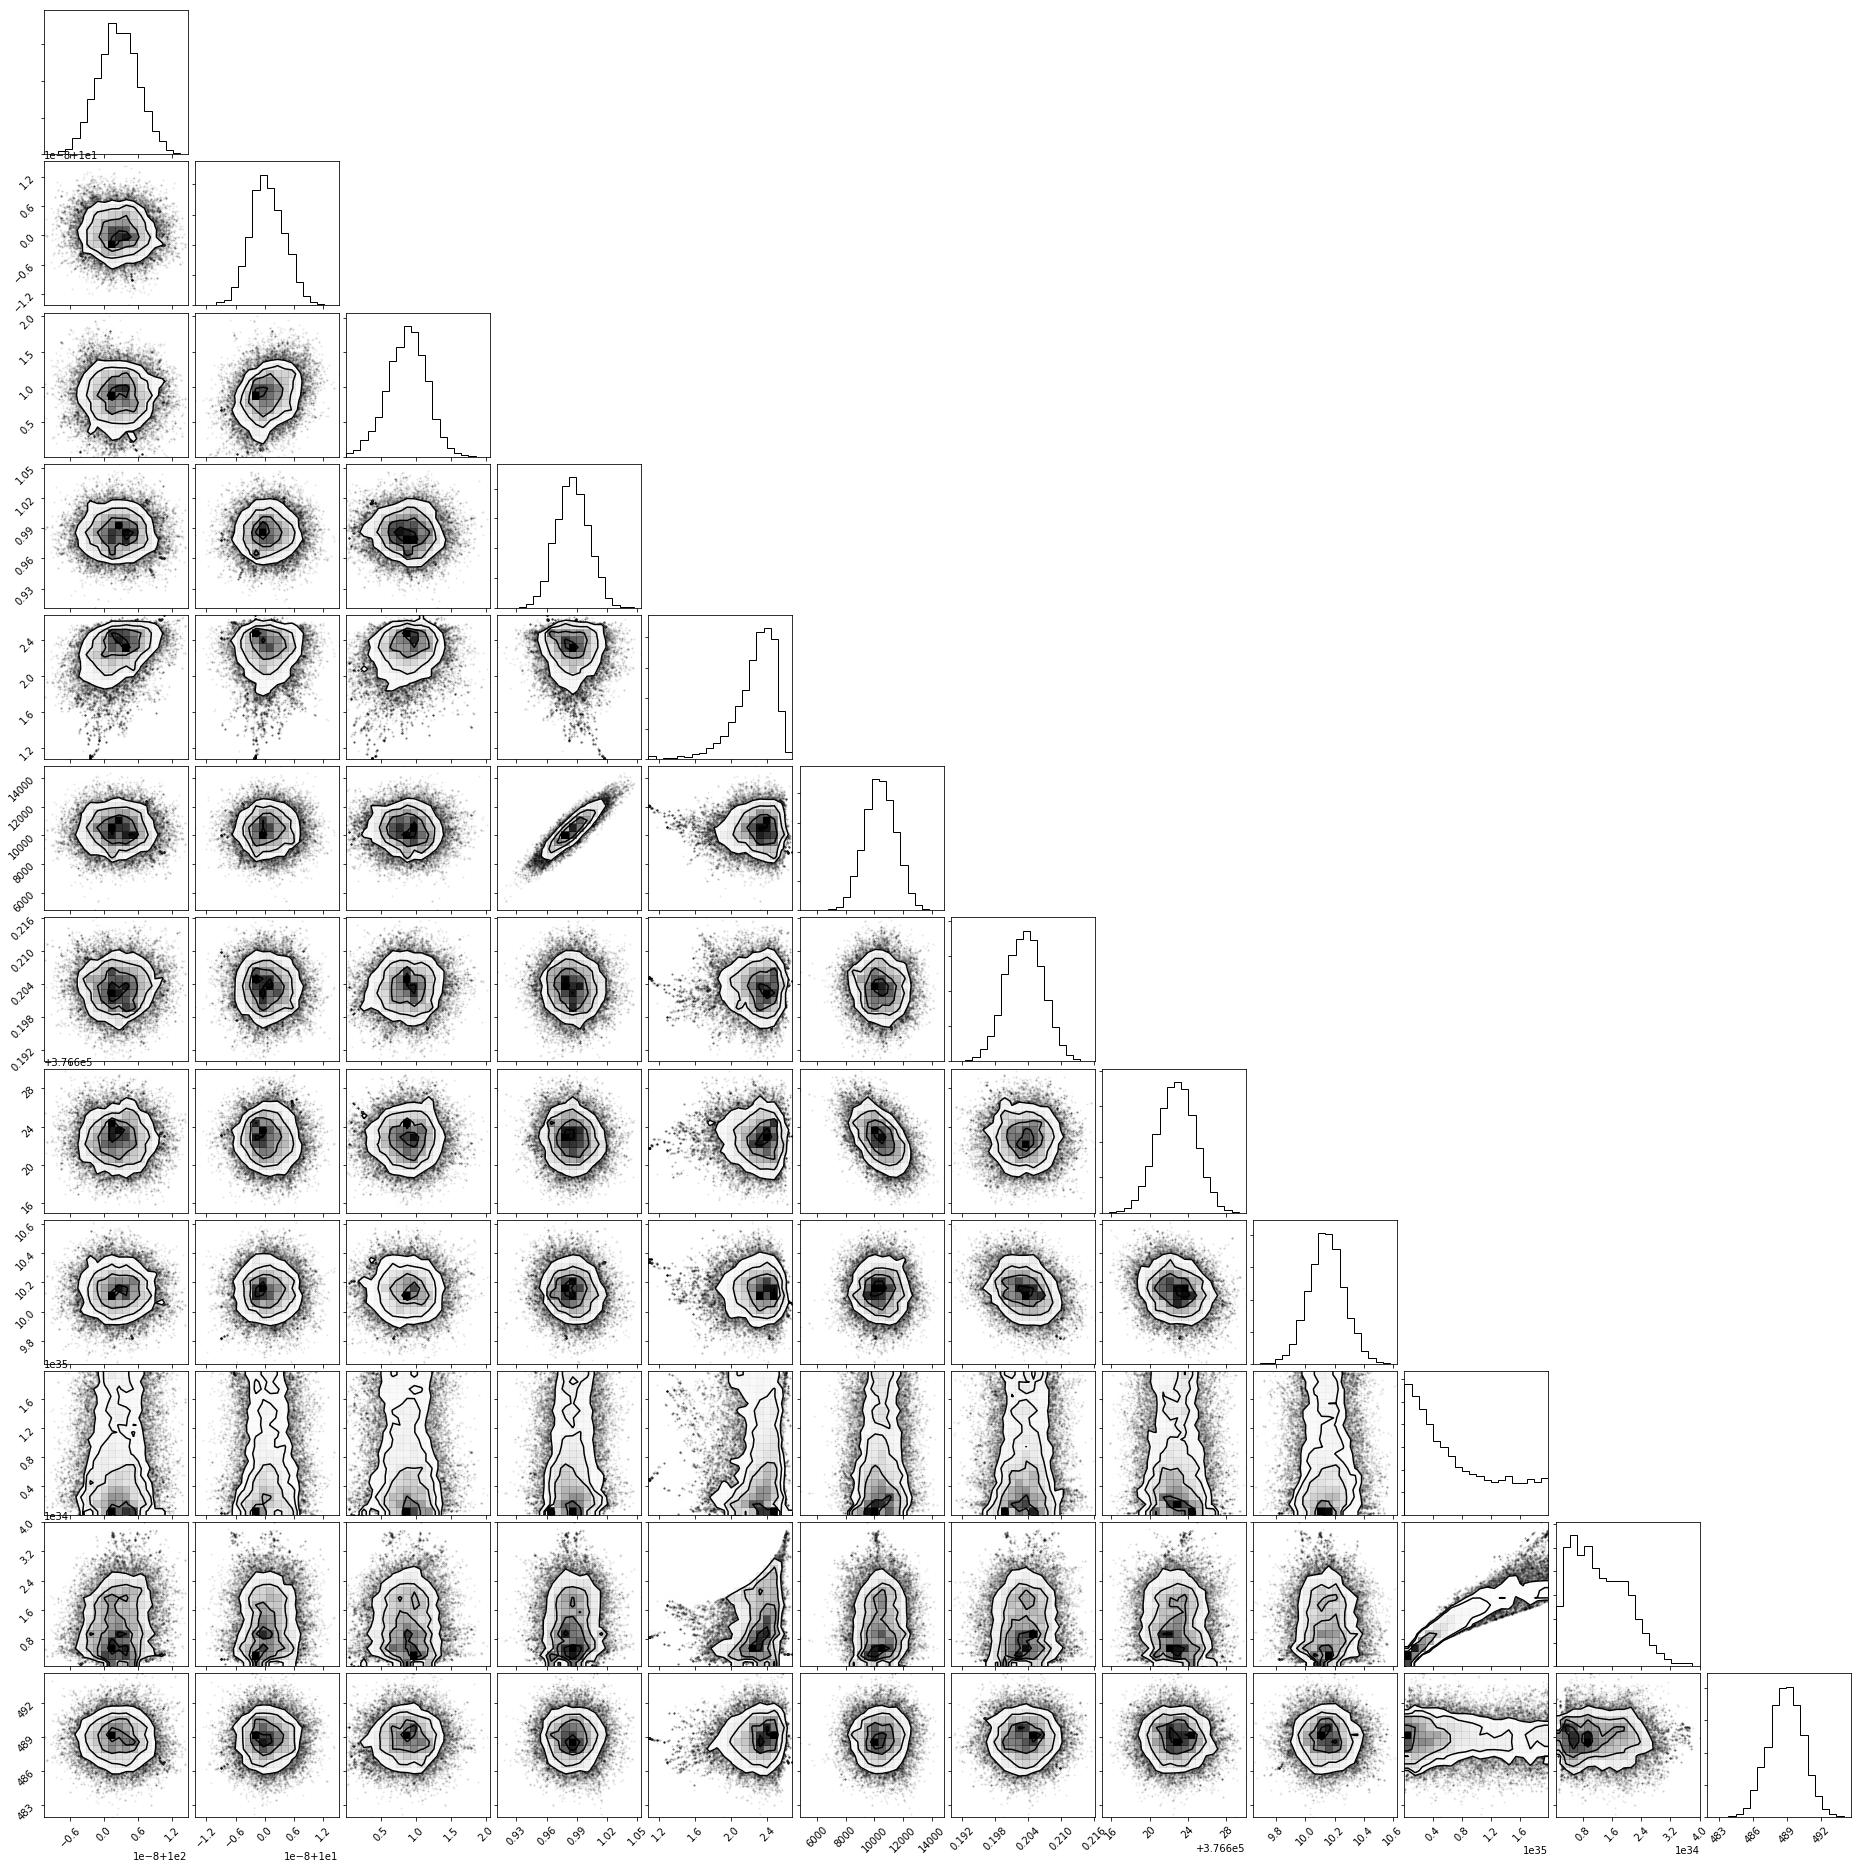

In [7]:
nchains, nsteps, nvar = chains.shape
chains_flat = chains.reshape((nchains*nsteps, nvar))

corner.corner(chains_flat)
plt.show()

In [8]:
i = 2
sys = data[i]

    
# create array from input system parameters
obs_pos = run_set.create_data_array(sys)

# Calculate truths for the binary
truths = run_set.get_truths(sys)

# Load posterior samples
filename = "../data/binary_set/system_" + str(i) + "_chains.npy"
chains_in = np.load(filename)

n_chains, n_steps, n_var = chains_in.shape
chains = chains_in.reshape((n_chains*n_steps, n_var))


# plot_trace(chains_in)
plotting.plot_orbit(obs_pos, chains_in, truths, nsamples=30, xlim=[0, 0.3], 
                    filename="../figures/binary_set/system_" + str(i) + "_orbit.pdf")


# Plot corner
plotting.plot_corner(chains, truths, filename="../figures/binary_set/system_" + str(i) + "_corner.pdf")


### Plot temperatures

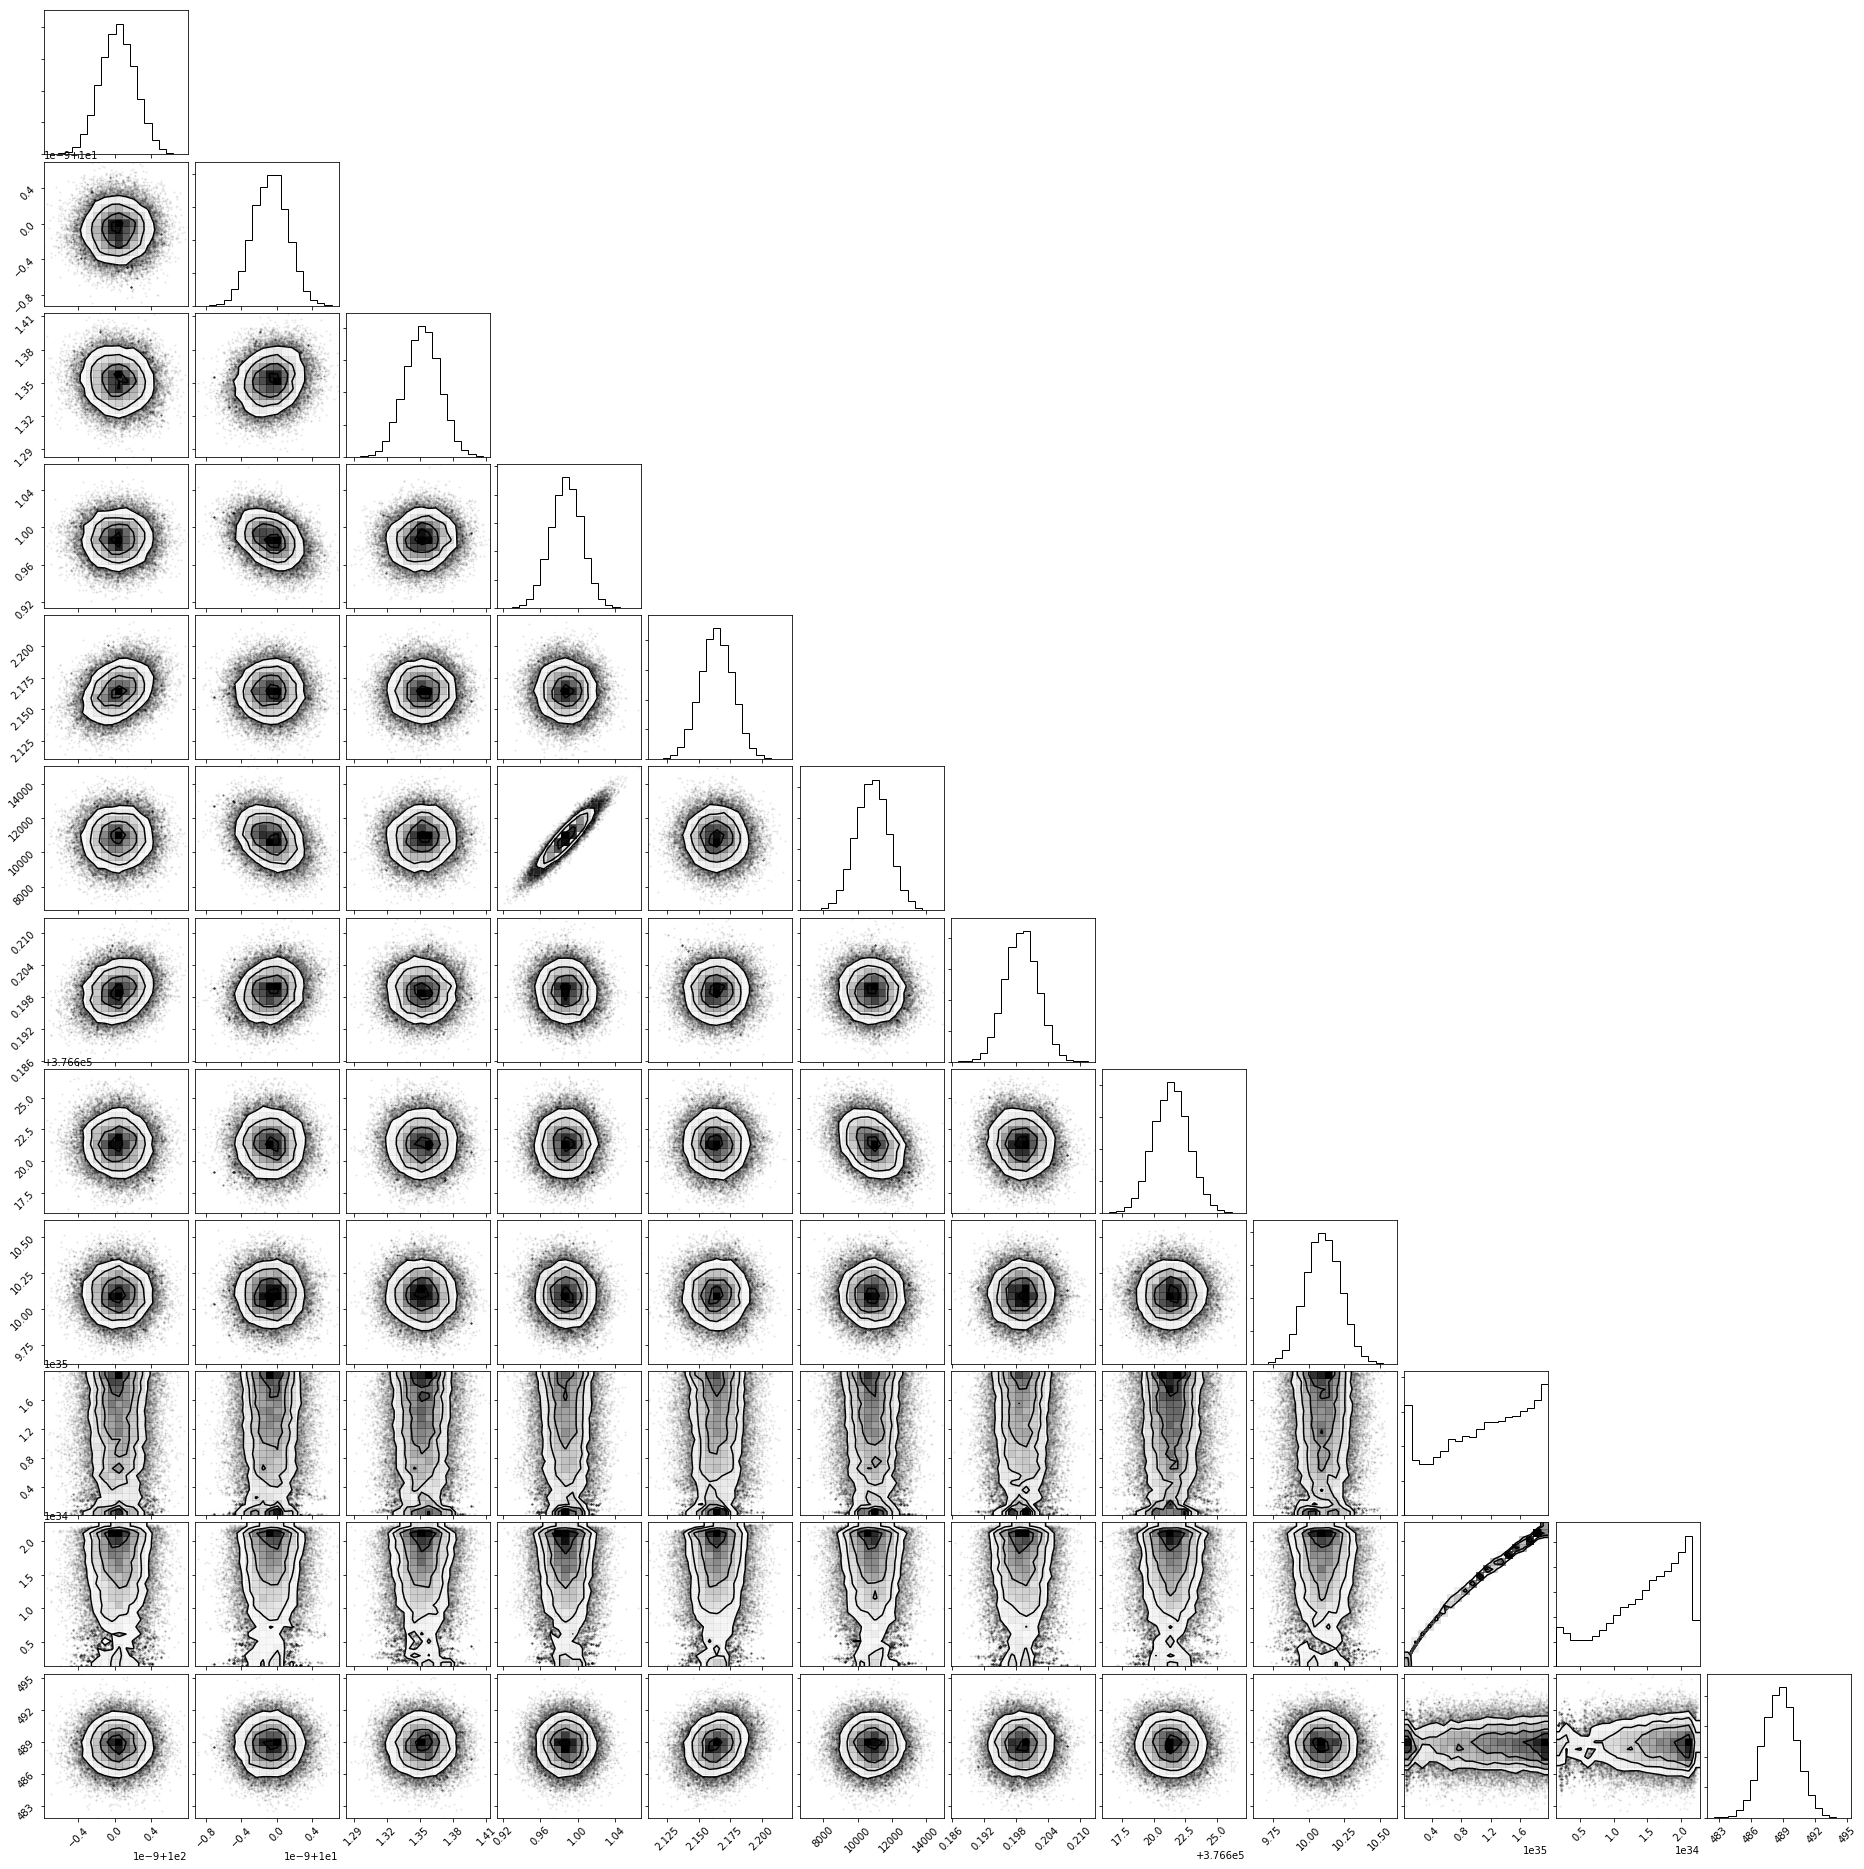

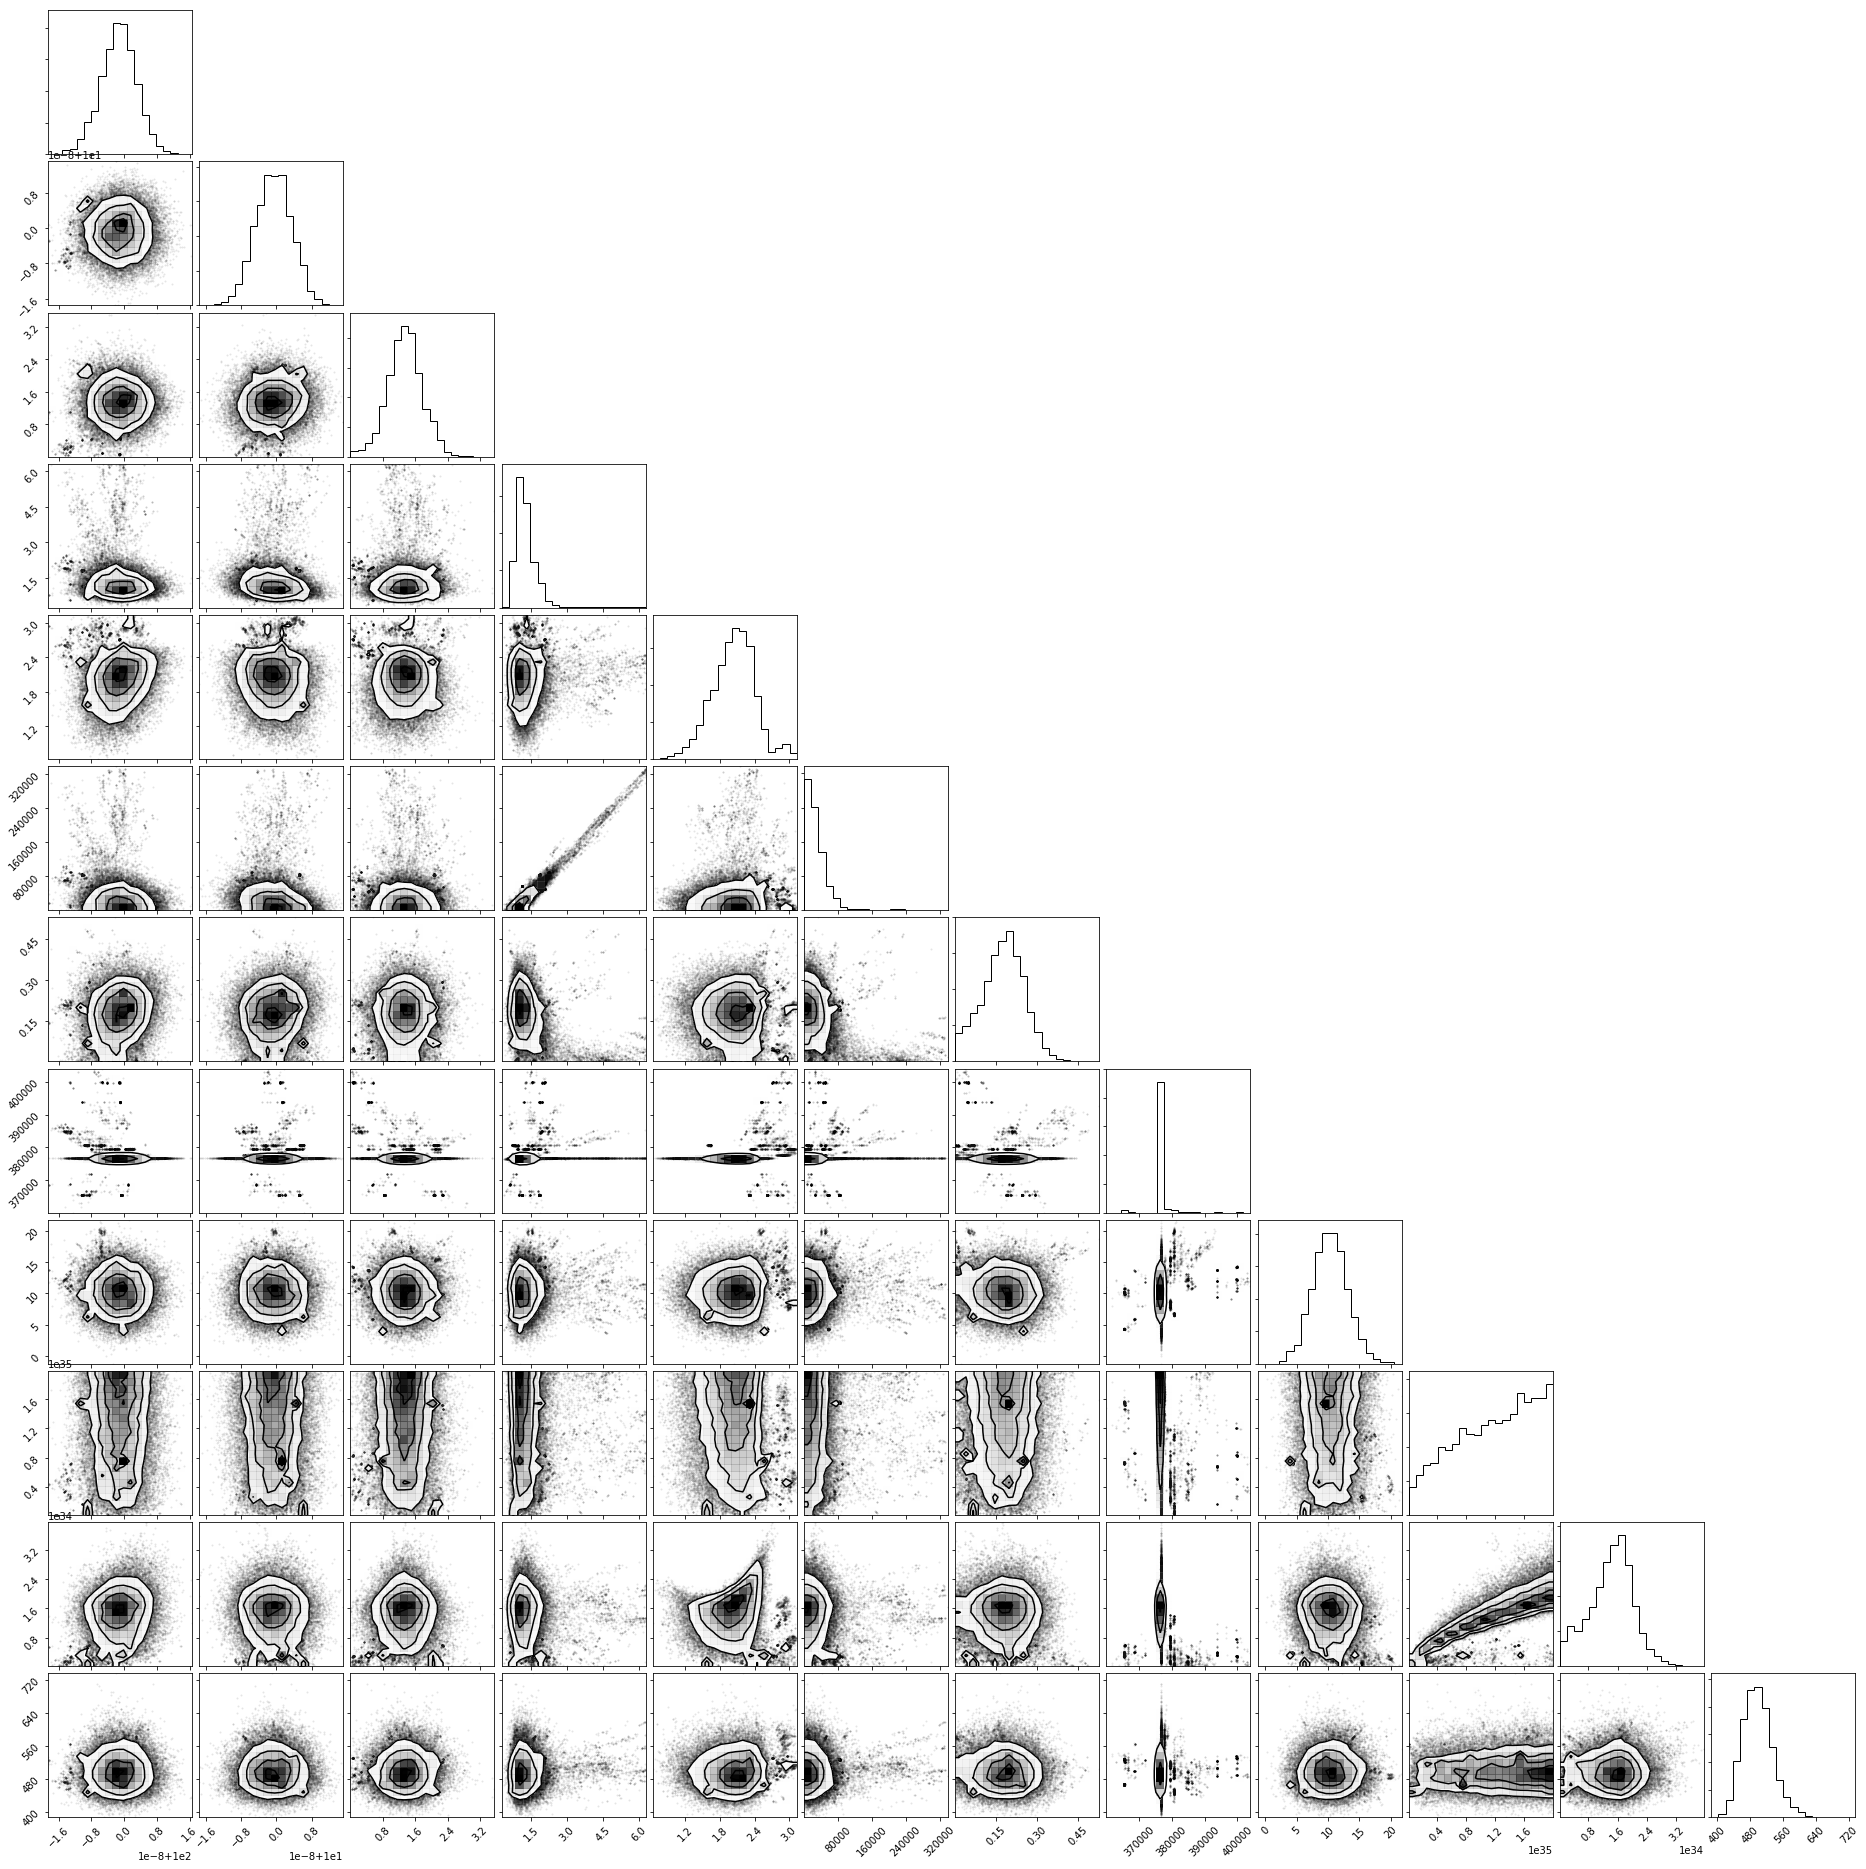

In [7]:
# Lowest Temp - actual posteriors

ntemps, nchains, nsteps, nvar = chains.shape
chains_flat = chains[0].reshape((nchains*nsteps, nvar))

corner.corner(chains_flat)
plt.show()


# Highest Temp - should approximate the priors

chains_flat = chains[9].reshape((nchains*nsteps, nvar))

corner.corner(chains_flat)
plt.show()

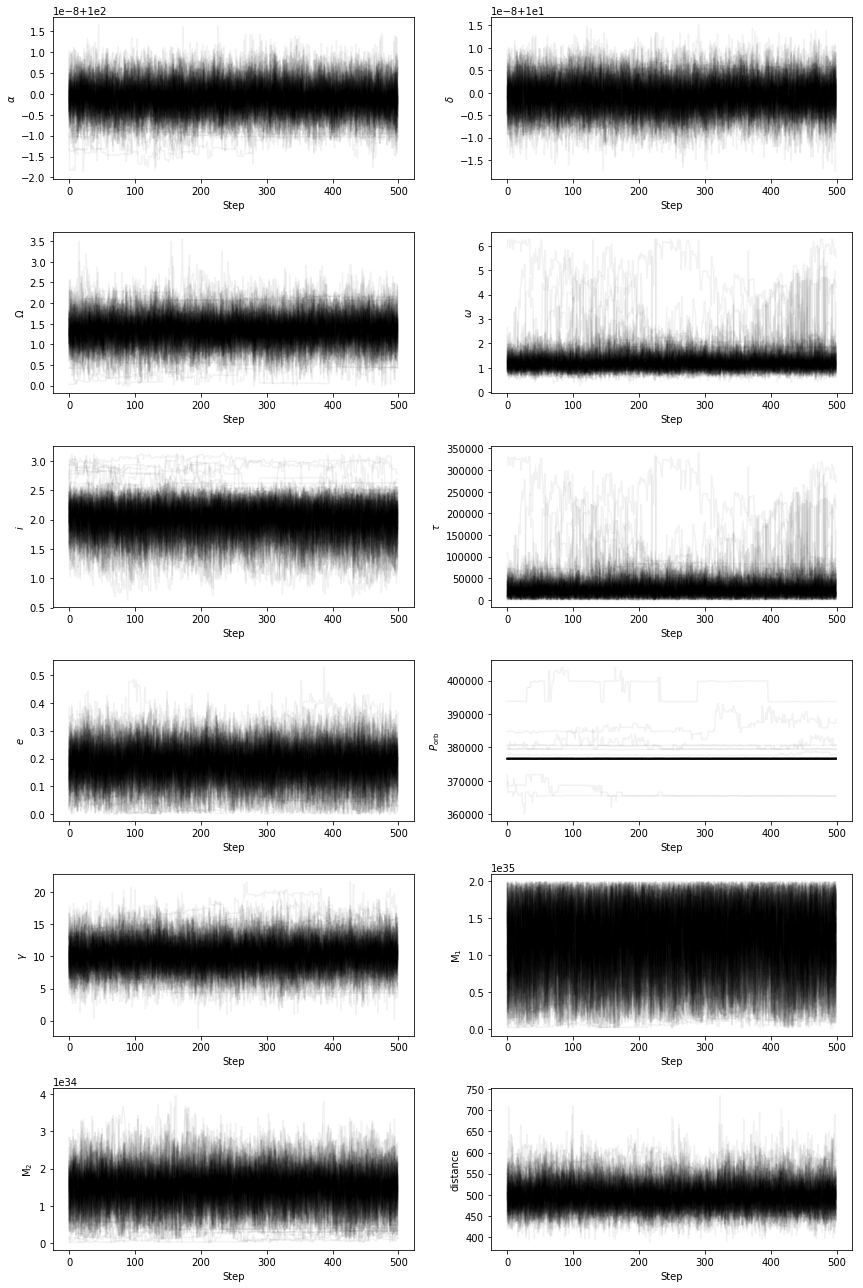

In [9]:
plot_trace(chains[9])

In [14]:
def plot_posterior_samples(obs_pos, chains, truths, filename=None, xlim=None, nsamples=30, alpha=0.1):
    
    nchains, nsteps, nvar = chains.shape
    chains_flat = chains.reshape((nchains*nsteps, nvar))
    idx = np.random.randint(nchains*nsteps, size=nsamples)

    
    fig, ax = plt.subplots(2, 2, figsize=(8,8))

    ax[0,0].scatter(obs_pos['ra']*3600.0*1.0e3, obs_pos['dec']*3600.0*1.0e3)

    t_tmp = np.linspace(0.0, np.max(obs_pos['time']), 10000)
    ra, dec = orbit.get_ra_dec(truths, t_tmp)
#     ax[0,0].plot(ra*3600.0*1.0e3, dec*3600.0*1.0e3, color='C0')
    if i in range(nsamples): 
        ra, dec = orbit.get_ra_dec(chains_flat[idx[i]], t_tmp)
        ax[0,0].plot(ra*3600.0*1.0e3, dec*3600.0*1.0e3, color='k', alpha=alpha)
        
    
    ax[0,0].set_xlabel(r"$\Delta\ \alpha$ (mas)")
    ax[0,0].set_ylabel(r"$\Delta\ \delta$ (mas)")


    rv = orbit.get_RV(truths, t_tmp)
    ax[1,0].plot(t_tmp/secyer, rv, color='C0')
    if i in range(nsamples): 
        rv = orbit.get_RV(chains_flat[idx[i]], t_tmp)
        ax[1,0].plot(t_tmp/secyer, rv, color='k', alpha=alpha)

    ax[1,0].scatter(obs_pos['time']/secyer, obs_pos['rv'], zorder=100)
    ax[1,0].set_xlabel("Time (yr)")
    ax[1,0].set_ylabel("Radial velocity (km s$^{-1}$)")
    if xlim is not None: ax[1,0].set_xlim(xlim)
    

    ax[0,1].plot(t_tmp/secyer, ra*3600.0*1.0e3, color='C0')
    if i in range(nsamples): 
        ra, dec = orbit.get_ra_dec(chains_flat[idx[i]], t_tmp)
        ax[0,1].plot(t_tmp/secyer, ra*3600.0*1.0e3, color='k', alpha=alpha)
    ax[0,1].scatter(obs_pos['time']/secyer, obs_pos['ra']*3600.0*1.0e3, zorder=100)
    ax[0,1].set_xlabel("Time (yr)")
    ax[0,1].set_ylabel(r"$\Delta\ \alpha$ (mas)")
    
    P_orb = truths[7]/secyer
    ax[0,1].set_title(r"P$_{\rm orb}$ = " + "%.4f" % P_orb + " yr")
    if xlim is not None: ax[0,1].set_xlim(xlim)

        
    ax[1,1].plot(t_tmp/secyer, dec*3600.0*1.0e3, color='C0')
    if i in range(nsamples): 
        ra, dec = orbit.get_ra_dec(chains_flat[idx[i]], t_tmp)
        ax[1,1].plot(t_tmp/secyer, dec*3600.0*1.0e3, color='k', alpha=alpha)

    ax[1,1].scatter(obs_pos['time']/secyer, obs_pos['dec']*3600.0*1.0e3, zorder=100)

    ax[1,1].set_xlabel("Time (yr)")
    ax[1,1].set_ylabel(r"$\Delta\ \delta$ (mas)")
    if xlim is not None: ax[1,1].set_xlim(xlim)
    
    plt.tight_layout()
    
    if filename is not None:
        plt.savefig(filename)
    else:
        plt.show()
        
    plt.clf()


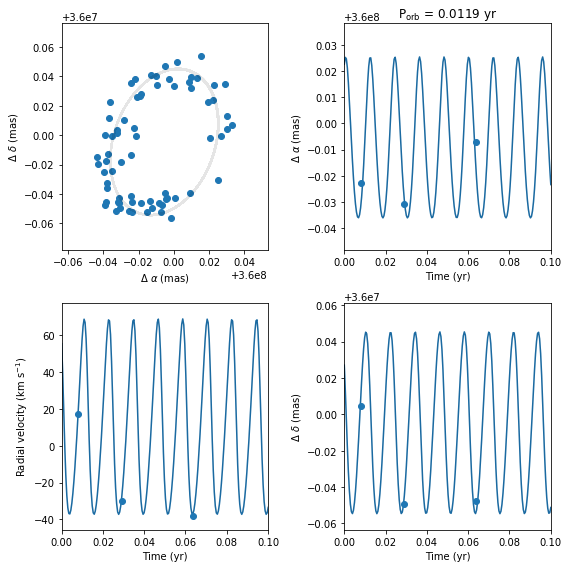

In [17]:
obs_pos = run_set.create_data_array(data[2])
truths = run_set.get_truths(data[2])

plot_posterior_samples(obs_pos, chains[0], truths, xlim=[0, 0.1])

In [19]:
print(data[2])
print(data[2].dtype)

( 5.69681597,  1.87180138,  0.19821298,  0.01193447,  0.10253549,  0.13471317,  0.48880753,  2.17451048,  1.34022999,  0.9826991,  9.75178242,   6.57745522e-06)
[('M1', '<f8'), ('M2', '<f8'), ('ecc', '<f8'), ('P_orb', '<f8'), ('sep', '<f8'), ('proj_sep', '<f8'), ('dist', '<f8'), ('inc', '<f8'), ('Omega', '<f8'), ('omega', '<f8'), ('G', '<f8'), ('sigma', '<f8')]


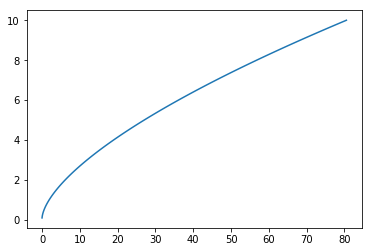

In [25]:
K_max = (np.max(obs_pos['rv']) - np.min(obs_pos['rv']))/2.

P_orb = data[2]['P_orb']
omega = data[2]['omega']
inc = data[2]['inc']
ecc = data[2]['ecc']

C0 = np.sqrt(1.0-ecc**2) * ((P_orb*secyer) / (2.0*np.pi * G))**(1./3.) / np.sin(inc) * (K_max*1.0e5)

# Convert to Msun
C0 /= Msun**(1./3.)

M2_tmp = np.linspace(0.1, 10.0, 100)
M1_tmp = (M2_tmp/C0)**(3./2.) - M2_tmp

plt.plot(M1_tmp, M2_tmp)



plt.show()